# Lasso in Concrete-ML

this tutorial is going to show you how to use ridge penalizing linear regression algorithm in Concrete-ml plus Ridge and 
Elastic-net 

**Concrete-ML** is an open-source, privacy-preserving, machine learning inference framework based on fully homomorphic encryption (FHE). It enables data scientists without any prior knowledge of cryptography to automatically turn machine learning models into their FHE equivalent, using familiar APIs from Scikit-learn and PyTorch. 
[documentation website](https://docs.zama.ai/concrete-ml)

![Alt text](https://801304998-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F75MldzZY6YYabEQfXDIR%2Fuploads%2Fgit-blob-bd13f146460dd3096ed0021391be3e4790c18bef%2F3.png?alt=media)

### what is difference between scikit-learn and concrete-ml for creating a ML model?
| Scikit-learn     | Concrete-ML   |
|----------------- |---------------|
| doesn't work on encrypted data             | works on encrypted data         |
 

### How can I apply the same model in sklearn in concrete-ml?
1. preparing dataset 
2. fitting in to the model
3. compiling the model on training set 
4. predict the encrypted data 

let's apply it on ridge - linear regression penalizing model

### Prerequisites 
1. installing *concrete-ml* library by `pip install concrete-ml` or using docker container

In [1]:
# importing the libraries
import time
from sklearn.datasets import make_regression # to create a regression dataset randomly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from concrete.ml.sklearn import Lasso as ConcreteLasso
import pandas as pd 

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [6]:
def fhe_model_trainer(model):
    model.fit(X_train, y_train)
    fhe_circuit = model.compile(X_train)
    fhe_circuit.client.keygen(force=False)
    return model

def skl_model_trainer(model):
    model.fit(X_train, y_train)
    return model

def create_y_space(X_test, fhe_model):
    x_space = np.linspace(X_test.min(), X_test.max(), num=300)[:, np.newaxis]
    y_pred = fhe_model.predict(x_space)
    return [x_space, y_pred]

def plot_dataset(ax,X_train, y_train, X_test, y_test):
#     fig = plt.figure(figsize=(10, 5))
    ax.scatter(X_train, y_train, marker='o', c='r', label='Train')
    ax.scatter(X_test, y_test, marker='x', c='black', label='test')
    ax.legend()

def plot_fhe(ax, X_test, fhe_model, **kwargs):
    space = create_y_space(X_test, fhe_model)
    ax.plot(space[0], space[1], **kwargs)

def plot_skl(ax, X_test, skl_model, **kwargs):
    y_pred = skl_model.predict(X_test)
    ax.plot(X_test, y_pred, **kwargs)

    

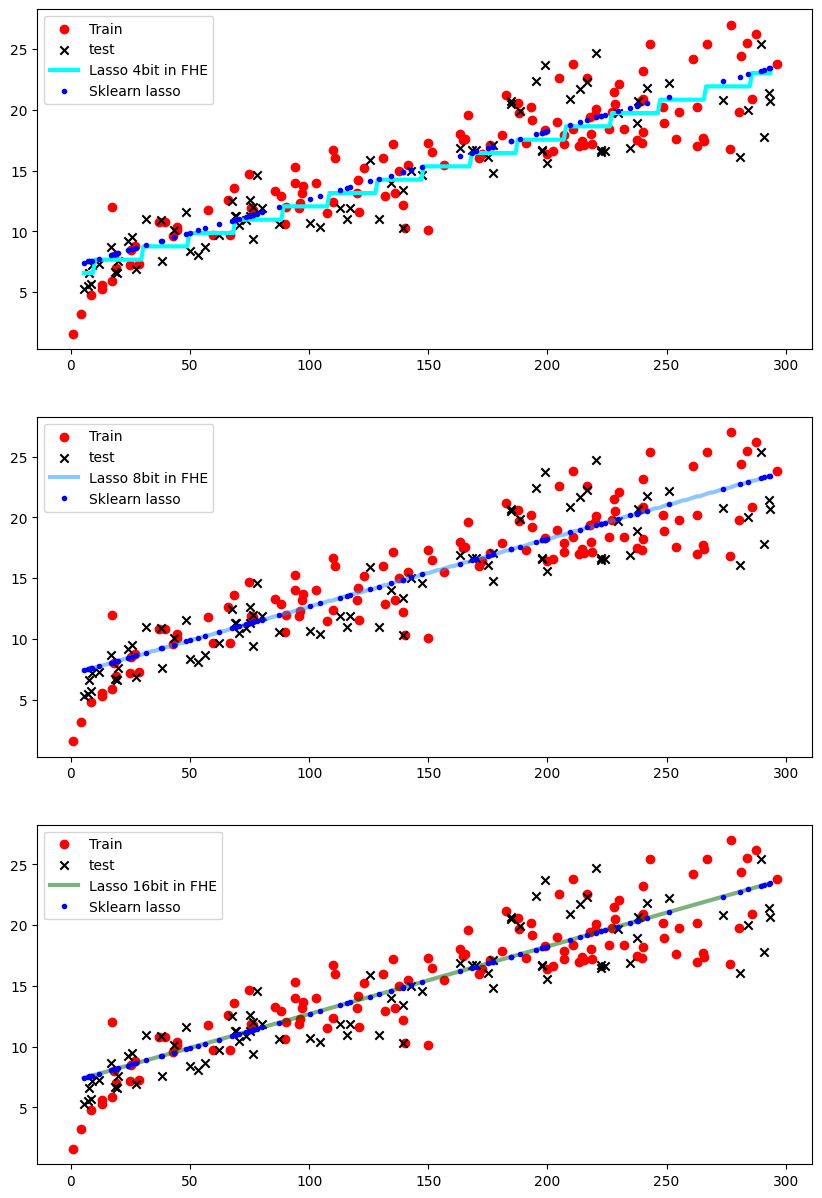

In [45]:
fhe_lasso_4bit = fhe_model_trainer(ConcreteLasso(n_bits=4, alpha=1))
fhe_lasso_8bit = fhe_model_trainer(ConcreteLasso(n_bits=8, alpha=1))
fhe_lasso_16bit = fhe_model_trainer(ConcreteLasso(n_bits=16, alpha=1))
skl_lasso = skl_model_trainer(Lasso(alpha=1))

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10,15)

plot_dataset(ax[0],X_train, y_train, X_test, y_test)
plot_fhe(ax[0],X_test, fhe_lasso_4bit, c="aqua", label="Lasso 4bit in FHE", linewidth=3)
ax[0].legend()

plot_dataset(ax[1],X_train, y_train, X_test, y_test)
plot_fhe(ax[1], X_test, fhe_lasso_8bit, c="dodgerblue", label="Lasso 8bit in FHE", linewidth=3, alpha=0.5)
ax[1].legend()

plot_dataset(ax[2],X_train, y_train, X_test, y_test)

plot_fhe(ax[2] ,X_test, fhe_lasso_16bit, c="darkgreen", label="Lasso 16bit in FHE", linewidth=3, alpha=0.5)
ax[2].legend()

for i in range(3):
    plot_skl(ax[i], X_test, skl_lasso, label="Sklearn lasso",c='blue', marker='o', markersize=3, linestyle="None", linewidth=0.7)
    ax[i].legend()

plt.xlabel("TV ads")
plt.show()

### Ridge

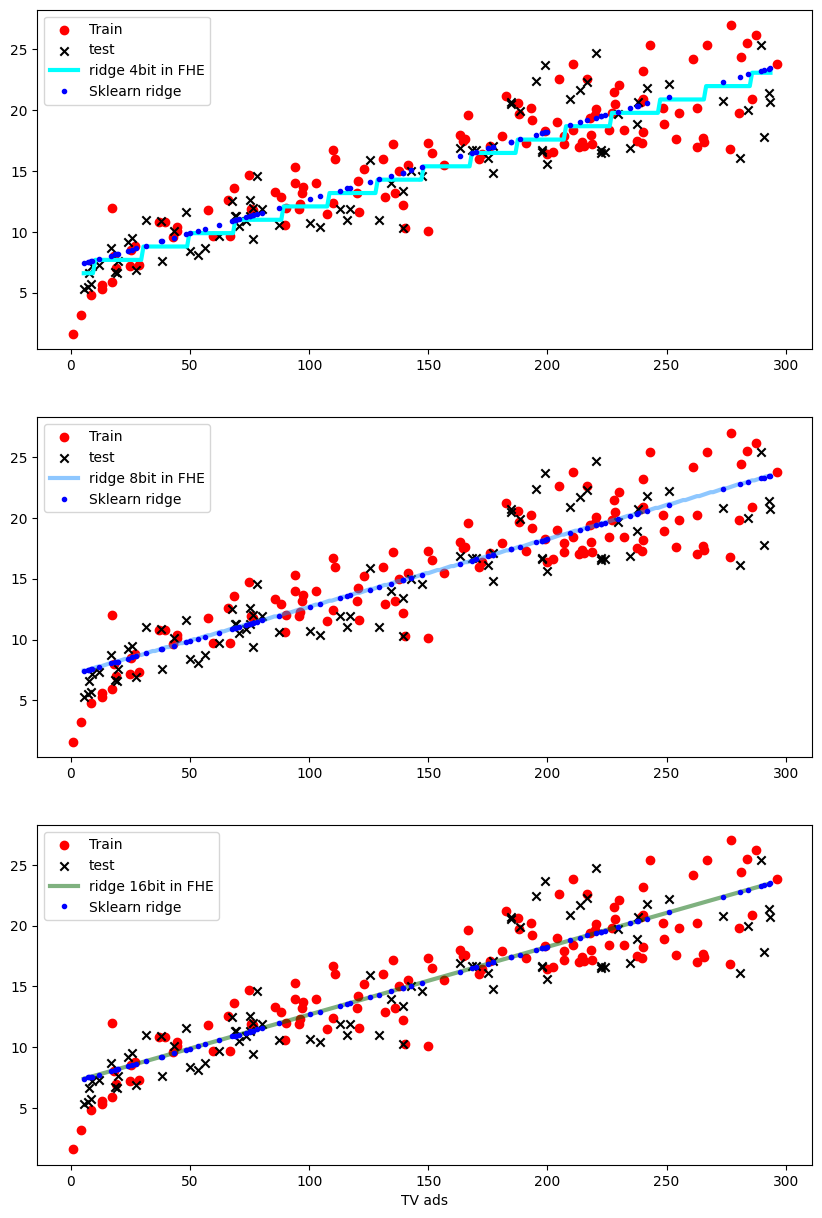

In [46]:
from concrete.ml.sklearn import Ridge as ConcreteRidge
from sklearn.linear_model import Ridge


fhe_ridge_4bit = fhe_model_trainer(ConcreteRidge(n_bits=4, alpha=1))
fhe_ridge_8bit = fhe_model_trainer(ConcreteRidge(n_bits=8, alpha=1))
fhe_ridge_16bit = fhe_model_trainer(ConcreteRidge(n_bits=16, alpha=1))
skl_ridge = skl_model_trainer(Ridge(alpha=1))

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10,15)

plot_dataset(ax[0],X_train, y_train, X_test, y_test)
plot_fhe(ax[0],X_test, fhe_ridge_4bit, c="aqua", label="ridge 4bit in FHE", linewidth=3)
ax[0].legend()

plot_dataset(ax[1],X_train, y_train, X_test, y_test)
plot_fhe(ax[1], X_test, fhe_ridge_8bit, c="dodgerblue", label="ridge 8bit in FHE", linewidth=3, alpha=0.5)
ax[1].legend()

plot_dataset(ax[2],X_train, y_train, X_test, y_test)

plot_fhe(ax[2] ,X_test, fhe_ridge_16bit, c="darkgreen", label="ridge 16bit in FHE", linewidth=3, alpha=0.5)
ax[2].legend()

for i in range(3):
    plot_skl(ax[i], X_test, skl_ridge, label="Sklearn ridge",c='blue', marker='o', markersize=3, linestyle="None", linewidth=0.7)
    ax[i].legend()

plt.xlabel("TV ads")
plt.show()

### ElasticNet

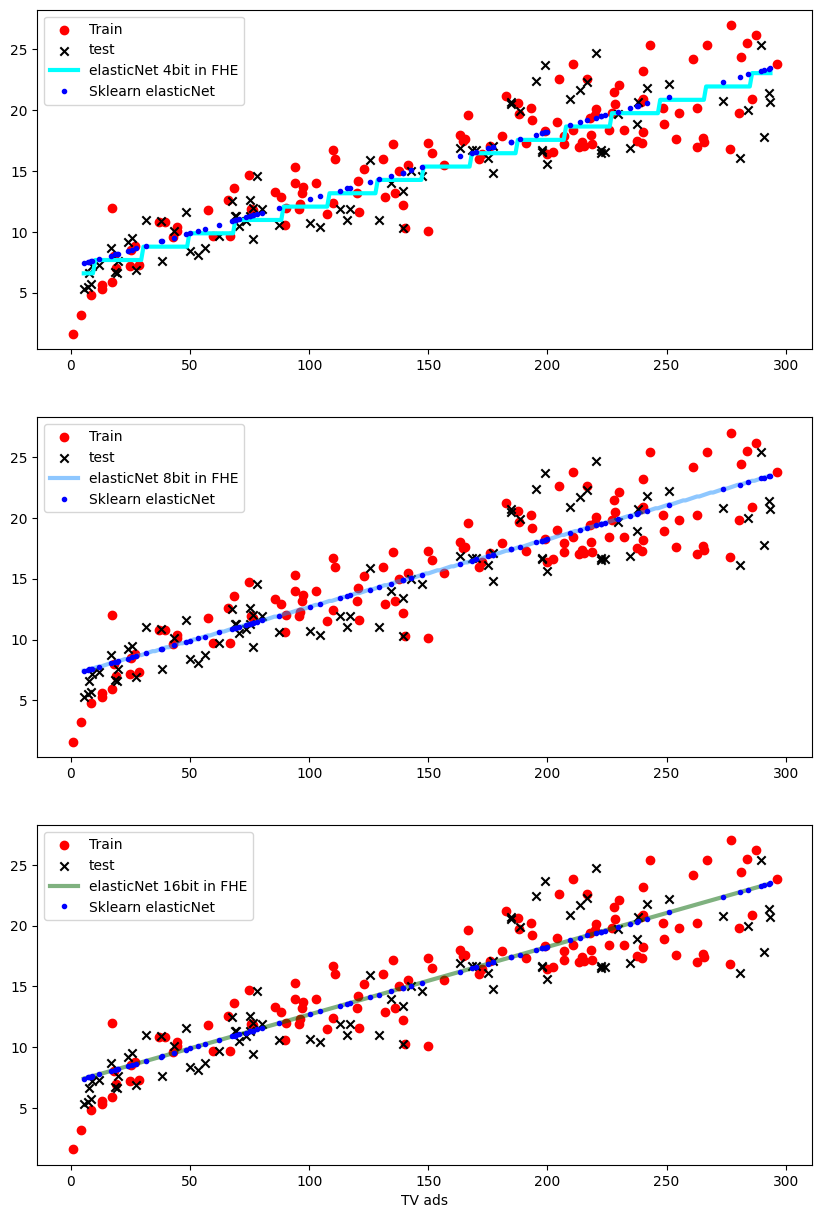

In [47]:
from concrete.ml.sklearn import ElasticNet as ConcreteElasticNet
from sklearn.linear_model import ElasticNet


fhe_elasticNet_4bit = fhe_model_trainer(ConcreteElasticNet(n_bits=4, alpha=1))
fhe_elasticNet_8bit = fhe_model_trainer(ConcreteElasticNet(n_bits=8, alpha=1))
fhe_elasticNet_16bit = fhe_model_trainer(ConcreteElasticNet(n_bits=16, alpha=1))
skl_elasticNet = skl_model_trainer(ElasticNet(alpha=1))

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10,15)

plot_dataset(ax[0],X_train, y_train, X_test, y_test)
plot_fhe(ax[0],X_test, fhe_elasticNet_4bit, c="aqua", label="elasticNet 4bit in FHE", linewidth=3)
ax[0].legend()

plot_dataset(ax[1],X_train, y_train, X_test, y_test)
plot_fhe(ax[1], X_test, fhe_elasticNet_8bit, c="dodgerblue", label="elasticNet 8bit in FHE", linewidth=3, alpha=0.5)
ax[1].legend()

plot_dataset(ax[2],X_train, y_train, X_test, y_test)

plot_fhe(ax[2] ,X_test, fhe_elasticNet_16bit, c="darkgreen", label="elasticNet 16bit in FHE", linewidth=3, alpha=0.5)
ax[2].legend()

for i in range(3):
    plot_skl(ax[i], X_test, skl_elasticNet, label="Sklearn elasticNet",c='blue', marker='o', markersize=3, linestyle="None", linewidth=0.7)
    ax[i].legend()

plt.xlabel("TV ads")
plt.show()

### Comparing the scoring results

# Congratulation you made it to the end

But on the client side, there's no model to use above parameter to encrypt data. 
instead we encrypt the client data and send it to server to 
be processed. for more information click [here](https://docs.zama.ai/concrete-ml/advanced-topics/client_server)
![Alt-text](https://801304998-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F75MldzZY6YYabEQfXDIR%2Fuploads%2Fgit-blob-f0c968fefec32658440dbc5814e2082b579c6200%2Fconcretemlgraph3.jpg?alt=media)